In [32]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
import numpy as np

In [33]:
mnist= tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [34]:
#normalise values from 0-255 to 0-1
x_train=x_train / 255
xtest= x_test/255

In [35]:
#to see image shape using first image
imglen,imgwidth =x_train[0].shape
print(imglen,"x",imgwidth)

28 x 28


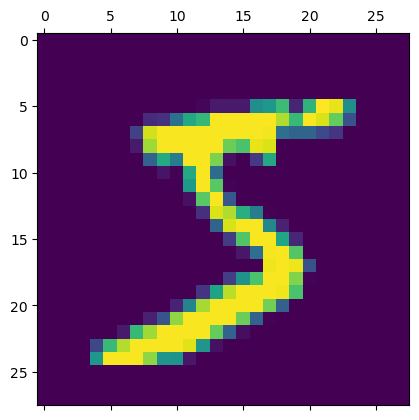

In [36]:
#to see how first image looks
plt.matshow(x_train[0])

In [37]:
#defining model architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])
#neuron number , activation function

In [38]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [39]:
#training model using SGD
model.compile(optimizer = 'sgd',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [40]:
history = model.fit(x_train,y_train,validation_data = (x_test,y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6568 - accuracy: 0.8307 - val_loss: 38.3271 - val_accuracy: 0.8975
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3342 - accuracy: 0.9069 - val_loss: 35.4820 - val_accuracy: 0.9161
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2852 - accuracy: 0.9208 - val_loss: 33.6287 - val_accuracy: 0.9234
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2563 - accuracy: 0.9281 - val_loss: 32.5179 - val_accuracy: 0.9279
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2344 - accuracy: 0.9344 - val_loss: 29.5887 - val_accuracy: 0.9343
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2163 - accuracy: 0.9391 - val_loss: 27.8915 - val_accuracy: 0.9375
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2008 - accuracy: 0.9445 - val_loss: 26.2994 - val_ac

In [41]:
#evaluate network
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss = %.3f" %test_loss)
print("Accuracy = %.3f" %test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 22.7825 - accuracy: 0.9494
Loss = 22.782
Accuracy = 0.949


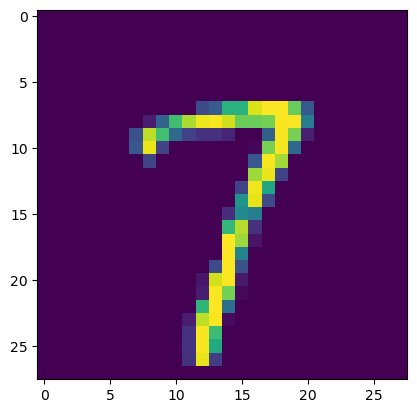

313/313 [==============================] - 1s 2ms/step


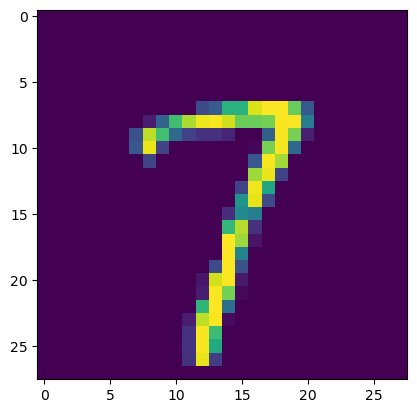

In [42]:
#Making Prediction on New Data
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()

In [43]:
print('Predicted Value: ',predicted_value[n])
# Print the predicted probabilities for that image

Predicted Value:  [0.         0.         0.         0.         0.         0.
 0.         0.99999994 0.         0.        ]


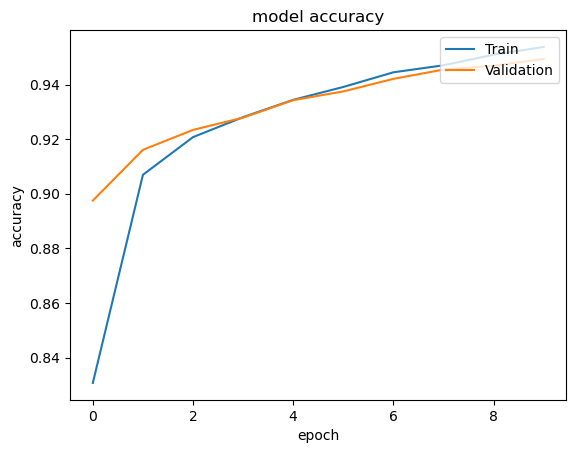

In [44]:
#plotting traing  accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

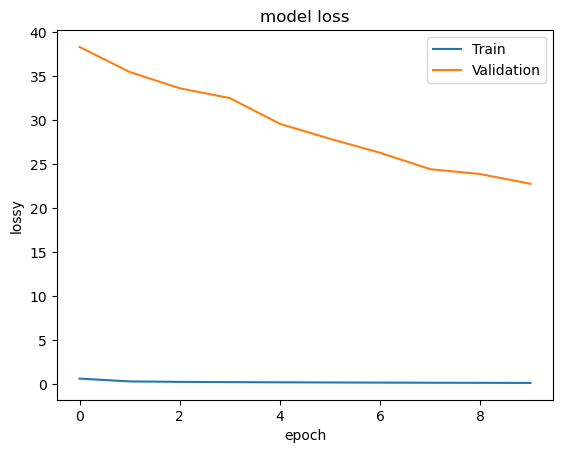

In [45]:
#plotting traing loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

In [46]:
test_predict = model.predict(x_test)
#get classification labels
test_predict_labels = np.argmax(test_predict,axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = test_predict_labels)
print('Confusion Matrix of the Test Set :\n' , confusion_matrix)

313/313 [==============================] - 1s 3ms/step
Confusion Matrix of the Test Set :
 tf.Tensor(
[[ 972    0    0    1    0    1    2    1    3    0]
 [   0 1109    2    3    0    0    4    1   16    0]
 [   8    1  974   10    4    0    7    6   21    1]
 [   0    0    8  968    0    4    1    7   17    5]
 [   2    1    9    2  915    0    7    1   11   34]
 [  10    2    1   33    4  791   12    1   29    9]
 [  11    3    4    1    7    6  919    0    7    0]
 [   3    6   22    6    4    0    0  947    5   35]
 [   4    1    1    9    4    1    5    3  943    3]
 [   8    4    2    9   13    0    1    4   12  956]], shape=(10, 10), dtype=int32)
